In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score

In [ ]:
df_train = pd.read_csv('Loans_Training')
df_test = pd.read_csv('Loans_Test')

In [53]:
df_train.describe()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
count,150302.000000,150302.000000,150302.000000,150302.000000,150302.000000
mean,0.500566,0.183538,672.023266,13427.080145,6042.186065
std,0.500001,0.137226,69.129157,9468.345958,4260.755681
min,0.000000,0.000000,371.000000,500.000000,225.000000
25%,0.000000,0.090000,647.000000,6000.000000,2700.000000
50%,1.000000,0.160000,684.000000,11000.000000,4950.000000
75%,1.000000,0.240000,714.000000,19000.000000,8550.000000
max,1.000000,1.030000,869.000000,44000.000000,19800.000000


In [54]:
df_test.describe()

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
count,49698.000000,49698.000000,49698.000000,49698.000000,49698.000000
mean,0.498290,0.183083,672.265564,13413.115216,6035.901847
std,0.500002,0.138024,69.156603,9466.987226,4260.144252
min,0.000000,0.000000,372.000000,500.000000,225.000000
25%,0.000000,0.090000,647.000000,6000.000000,2700.000000
50%,0.000000,0.160000,684.000000,11000.000000,4950.000000
75%,1.000000,0.240000,714.000000,19000.000000,8550.000000
max,1.000000,1.050000,866.000000,42000.000000,18900.000000


In [35]:
#convert categorical features to numerical
#True = 1 & False = 0 
df_train['Approval'] = [1 if i == "T" else 0 for i in df_train['Approval']]
df_train['Approval']

0         0
1         0
2         0
3         0
4         0
         ..
150297    1
150298    1
150299    1
150300    1
150301    1
Name: Approval, Length: 150302, dtype: int64

[Text(418.5, 475.65000000000003, 'FICO Score <= 656.5\nentropy = 1.0\nsamples = 150302\nvalue = [75066, 75236]\nclass = False'),
 Text(209.25, 339.75, 'FICO Score <= 644.5\nentropy = 0.168\nsamples = 43749\nvalue = [42659, 1090]\nclass = True'),
 Text(104.625, 203.85000000000002, 'entropy = 0.025\nsamples = 36483\nvalue = [36394, 89]\nclass = True'),
 Text(313.875, 203.85000000000002, 'entropy = 0.578\nsamples = 7266\nvalue = [6265, 1001]\nclass = True'),
 Text(627.75, 339.75, 'Debt-to-Income Ratio <= 0.315\nentropy = 0.886\nsamples = 106553\nvalue = [32407, 74146]\nclass = False'),
 Text(523.125, 203.85000000000002, 'FICO Score <= 669.5\nentropy = 0.773\nsamples = 94476\nvalue = [21477, 72999]\nclass = False'),
 Text(418.5, 67.94999999999999, 'entropy = 0.991\nsamples = 10089\nvalue = [4489, 5600]\nclass = False'),
 Text(627.75, 67.94999999999999, 'entropy = 0.725\nsamples = 84387\nvalue = [16988, 67399]\nclass = False'),
 Text(732.375, 203.85000000000002, 'entropy = 0.453\nsamples = 

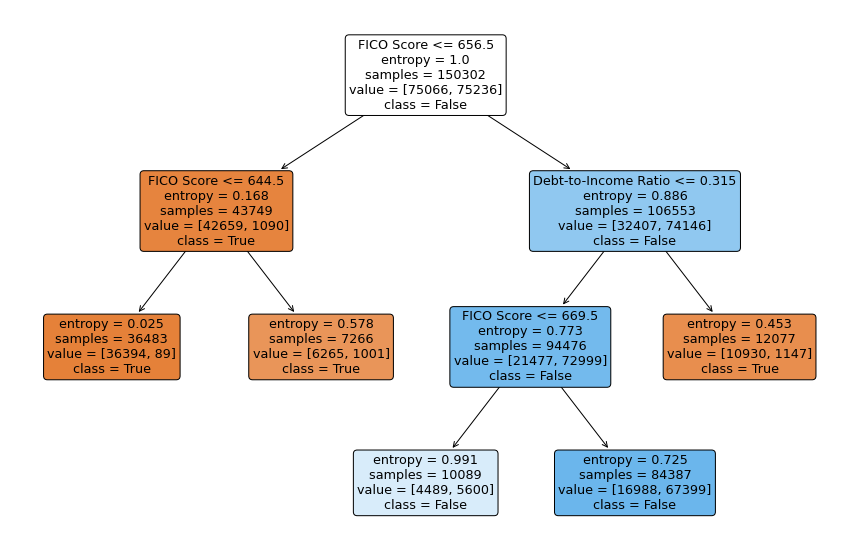

In [36]:
#C5.0 model on training dataset
y = df_train[['Approval']]
X = df_train[['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']]
X_names = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
y_names = ['True', 'False']
model = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 5). fit(X,y)
c50 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5). fit(X,y)
fig = plt.figure(figsize=(15,10))
tree.plot_tree(c50_01, feature_names = X_names, 
               class_names= y_names,
               filled = True,
              rounded = True)

In [37]:
df_test['Approval'] = [1 if i == "T" else 0 for i in df_test['Approval']]
df_test['Approval']

0        0
1        0
2        0
3        0
4        0
        ..
49693    1
49694    1
49695    1
49696    1
49697    1
Name: Approval, Length: 49698, dtype: int64

[Text(418.5, 733.86, 'FICO Score <= 655.5\nentropy = 1.0\nsamples = 49698\nvalue = [24934, 24764]\nclass = True'),
 Text(279.0, 570.78, 'entropy = 0.152\nsamples = 14182\nvalue = [13871, 311]\nclass = True'),
 Text(558.0, 570.78, 'Debt-to-Income Ratio <= 0.335\nentropy = 0.895\nsamples = 35516\nvalue = [11063, 24453]\nclass = False'),
 Text(418.5, 407.70000000000005, 'Debt-to-Income Ratio <= 0.265\nentropy = 0.801\nsamples = 32137\nvalue = [7820, 24317]\nclass = False'),
 Text(279.0, 244.62, 'FICO Score <= 666.5\nentropy = 0.744\nsamples = 28840\nvalue = [6088, 22752]\nclass = False'),
 Text(139.5, 81.54000000000008, 'entropy = 1.0\nsamples = 2320\nvalue = [1150, 1170]\nclass = False'),
 Text(418.5, 81.54000000000008, 'entropy = 0.693\nsamples = 26520\nvalue = [4938, 21582]\nclass = False'),
 Text(558.0, 244.62, 'entropy = 0.998\nsamples = 3297\nvalue = [1732, 1565]\nclass = True'),
 Text(697.5, 407.70000000000005, 'entropy = 0.243\nsamples = 3379\nvalue = [3243, 136]\nclass = True')]

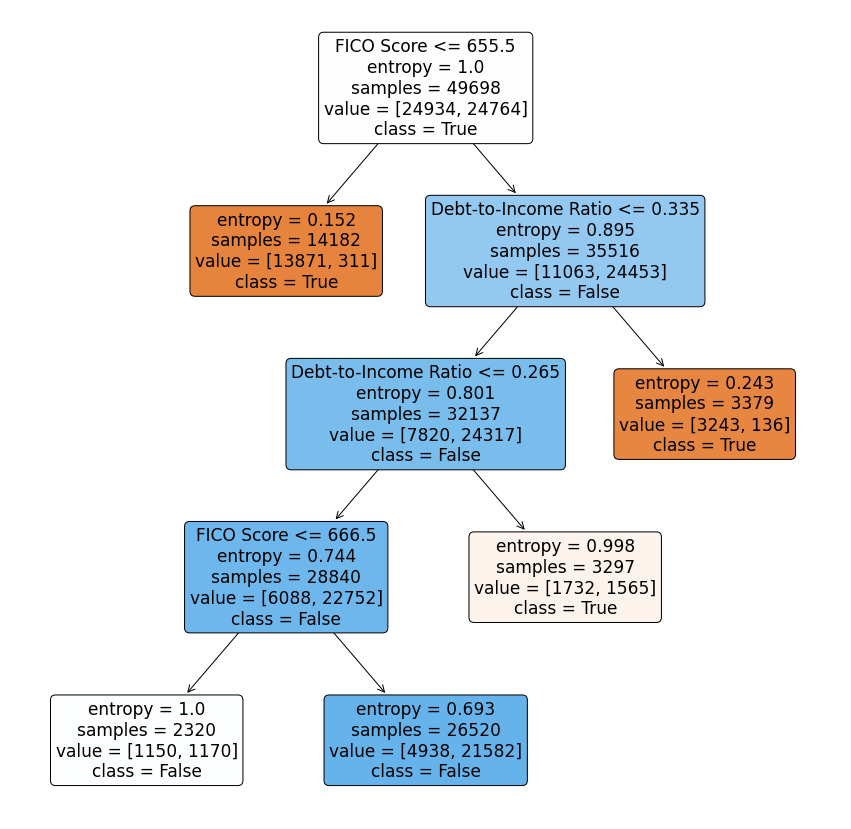

In [38]:
y_test = df_test[['Approval']]
X_test = df_test[['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']]
X_names_test = ['Debt-to-Income Ratio', 'FICO Score', 'Request Amount']
y_names_test = ['True', 'False']
model_test = DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = 5). fit(X_test,y_test)
c50_test = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=5). fit(X_test,y_test)
fig = plt.figure(figsize=(15,15))
tree.plot_tree(c50_test, feature_names = X_names_test, 
               class_names= y_names_test,
               filled = True,
              rounded = True)

In [50]:
#C5.0 precision score
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score
predLoan_c50 = c50.predict(X_test)
print(classification_report(y_test,predLoan_c50))

              precision    recall  f1-score   support

           0       0.96      0.71      0.81     24934
           1       0.77      0.97      0.86     24764

    accuracy                           0.84     49698
   macro avg       0.86      0.84      0.84     49698
weighted avg       0.86      0.84      0.84     49698



In [66]:
confusion_matrix(y_test, predLoan_c50)

array([[17665,  7269],
       [  751, 24013]], dtype=int64)

In [40]:
print(accuracy_score(y_test,predLoan_c50))

0.8386252967926274


In [65]:
error_rate = 1 - 0.84
print(error_rate)

0.16000000000000003


In [64]:
print(recall_score(y_test,predLoan_c50))

0.9696737199160071


In [63]:
print(precision_score(y_test,predLoan_c50))

0.7676299469343393


In [57]:
print(f1_score(y_test,predLoan_c50))

0.8569032580380403


In [61]:
f2_score = (5*.97*.77)/((4*.77)+ .97)
print(f2_score)

0.9220987654320988


In [62]:
f05_score = (1.25 * .97 * .77)/((0.25 * .77) + .97)
print(f05_score)

0.8031182795698923
